# Proyecto Network Science, analisis Dataset Gowalla focalizado en San Francisco 

Trabajo realizado por: 
- Nicolas Raul Rojas Feria  
- Holman Alexander Hernandez Nieto

In [1]:
!pip install basemap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
import os
import pandas as pd
import subprocess
from shapely.geometry import Polygon, Point
import networkx as nx
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cp -r /content/gdrive/Shareddrives/'Network Science'/PROYECTO/ . 
%cd PROYECTO

/content/PROYECTO


 gdrive/  'Network Science'/   PROYECTO/   sample_data/


In [ ]:
G_df = pd.read_csv('Aristas_filter_3.csv', sep='\t')
G_df

,Source,Target
0,3,145
1,3,186
2,3,529
3,3,627
4,3,663
...,...,...
93257,56720,89791
93258,56721,15456
93259,56721,56663
93260,56721,56671


In [ ]:
G_at = pd.read_csv('Nodos_Ciudades_filter.csv', sep=',')
G_at

,ID,DATE,X,Y,Label,Ciudades
0,0,2010-08-19T20:51:29Z,37.761508,-122.425767,13338,San Francisco
1,0,2010-08-19T20:20:56Z,37.759689,-122.427177,9153,San Francisco
2,0,2010-08-19T07:06:11Z,37.785948,-122.410618,202692,San Francisco
3,0,2010-08-18T17:56:37Z,37.782605,-122.407608,14608,San Francisco
4,0,2010-06-10T22:53:50Z,37.783130,-122.403874,1221889,San Francisco
...,...,...,...,...,...,...
116833,195472,2010-06-08T17:08:20Z,37.789089,-122.405014,729808,San Francisco
116834,196066,2010-10-15T01:59:04Z,37.782500,-122.432625,20813,San Francisco
116835,196066,2010-10-14T19:54:44Z,37.803489,-122.402166,54259,San Francisco
116836,196066,2010-10-14T03:36:25Z,37.799627,-122.408395,233202,San Francisco


In [ ]:
G = nx.from_pandas_edgelist(G_df, source='Source', target='Target')
#G.edges(data=True)

NameError: ignored

In [ ]:
print(G)

Graph with 33018 nodes and 61648 edges


# Prueba

In [ ]:
G_df = pd.read_csv('Aristas_filter_3.csv', sep='\t')
G_df

,Source,Target
0,3,145
1,3,186
2,3,529
3,3,627
4,3,663
...,...,...
93257,56720,89791
93258,56721,15456
93259,56721,56663
93260,56721,56671


In [ ]:
G_df = G_df[:1000]

In [ ]:
G = nx.from_pandas_edgelist(G_df, source='Source', target='Target')
G.edges(data=True) 

EdgeDataView([(3, 145, {}), (3, 186, {}), (3, 529, {}), (3, 627, {}), (3, 663, {}), (3, 670, {}), (3, 672, {}), (3, 681, {}), (3, 683, {}), (3, 705, {}), (3, 717, {}), (3, 754, {}), (3, 757, {}), (3, 761, {}), (3, 762, {}), (3, 768, {}), (3, 824, {}), (3, 828, {}), (3, 839, {}), (3, 843, {}), (3, 846, {}), (3, 848, {}), (3, 881, {}), (3, 889, {}), (3, 901, {}), (3, 917, {}), (3, 922, {}), (3, 935, {}), (3, 955, {}), (3, 988, {}), (3, 1012, {}), (3, 1016, {}), (3, 1020, {}), (3, 1097, {}), (3, 1118, {}), (3, 1131, {}), (3, 1136, {}), (3, 1160, {}), (3, 1161, {}), (3, 1178, {}), (3, 1179, {}), (3, 1183, {}), (3, 1184, {}), (3, 1204, {}), (3, 1220, {}), (3, 1226, {}), (3, 1230, {}), (3, 1239, {}), (3, 1264, {}), (3, 1273, {}), (3, 1289, {}), (3, 1305, {}), (3, 1329, {}), (3, 1350, {}), (3, 1372, {}), (3, 1385, {}), (3, 1393, {}), (3, 1437, {}), (3, 1445, {}), (3, 1688, {}), (3, 1699, {}), (3, 1811, {}), (3, 1863, {}), (3, 1928, {}), (3, 1938, {}), (3, 1951, {}), (3, 1995, {}), (3, 2064, {

In [ ]:
print(G)

Graph with 775 nodes and 994 edges


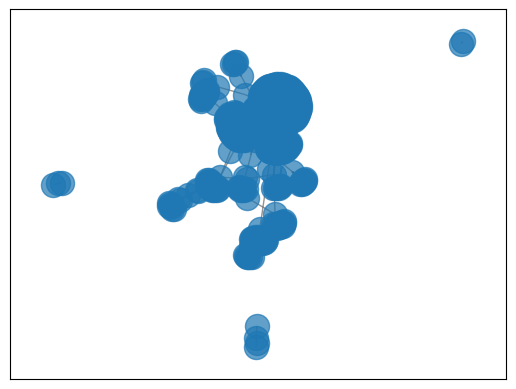

In [ ]:
nx.draw_networkx(G, alpha=0.7, with_labels=False, edge_color='.4')

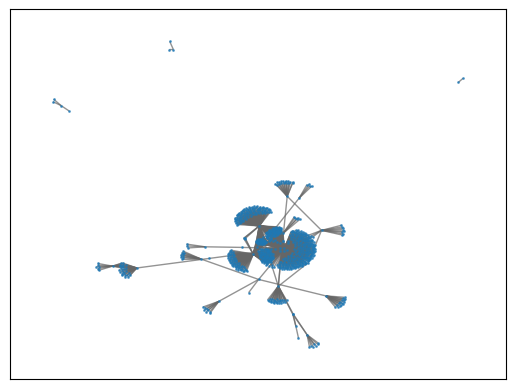

In [ ]:
nx.draw_networkx(G, alpha=0.7, with_labels=False, edge_color='.4', node_size=1)

In [ ]:
G.nodes(data=True)

NodeDataView({3: {}, 145: {}, 186: {}, 529: {}, 627: {}, 663: {}, 670: {}, 672: {}, 681: {}, 683: {}, 705: {}, 717: {}, 754: {}, 757: {}, 761: {}, 762: {}, 768: {}, 824: {}, 828: {}, 839: {}, 843: {}, 846: {}, 848: {}, 881: {}, 889: {}, 901: {}, 917: {}, 922: {}, 935: {}, 955: {}, 988: {}, 1012: {}, 1016: {}, 1020: {}, 1097: {}, 1118: {}, 1131: {}, 1136: {}, 1160: {}, 1161: {}, 1178: {}, 1179: {}, 1183: {}, 1184: {}, 1204: {}, 1220: {}, 1226: {}, 1230: {}, 1239: {}, 1264: {}, 1273: {}, 1289: {}, 1305: {}, 1329: {}, 1350: {}, 1372: {}, 1385: {}, 1393: {}, 1437: {}, 1445: {}, 1688: {}, 1699: {}, 1811: {}, 1863: {}, 1928: {}, 1938: {}, 1951: {}, 1995: {}, 2064: {}, 2083: {}, 2087: {}, 2189: {}, 2435: {}, 2440: {}, 2444: {}, 2445: {}, 2446: {}, 2451: {}, 2456: {}, 2492: {}, 2501: {}, 2510: {}, 2513: {}, 2516: {}, 2519: {}, 2520: {}, 2522: {}, 2526: {}, 2530: {}, 2544: {}, 2551: {}, 2556: {}, 2563: {}, 2598: {}, 2600: {}, 2628: {}, 2655: {}, 2656: {}, 2663: {}, 2665: {}, 2672: {}, 2677: {},

In [ ]:
G_at.to_dict().keys()

dict_keys(['ID', 'DATE', 'X ', 'Y ', 'Label', 'Ciudades'])

In [ ]:
x = G_at.to_dict()['X '] 
y = G_at.to_dict()['Y '] 
x = list(x.values())
y = list(y.values())

location = list(zip(x, y))

In [ ]:
print(location[0])

(37.7615082532, -122.4257665873)


In [ ]:
print(location[0:10])

[(37.7615082532, -122.4257665873), (37.759688872, -122.4271774292), (37.78594785, -122.4106178), (37.7826046833, -122.4076080167), (37.7831295924, -122.4038743973), (37.7864788714, -122.403563261), (37.7795577, -122.39790915), (37.7825583, -122.4001254333), (37.7857173715, -122.3992462045), (37.7881916086, -122.4012136459)]


In [ ]:
#nx.set_node_attributes(G, location, "location")

In [ ]:
#pos = nx.get_node_attributes(G, 'location')

In [ ]:
#print(pos)

{}


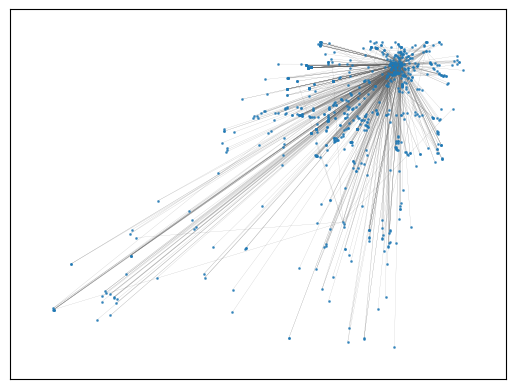

In [ ]:
nx.draw_networkx(G,location, alpha=0.7, with_labels=False, edge_color='.4', node_size=1, width=0.1)

Ahora vamos a poner los puntos obtennidos dentro del area que delimitamos de San Francisco:

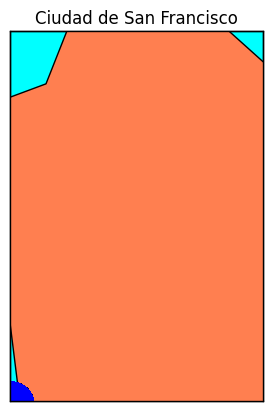

In [ ]:
west, south, east, north = -122.503913,37.681416, -122.394677, 37.807452

# fig = plt.figure(figsize=(18,14))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
nx.draw_networkx(G,location, alpha=0.7, with_labels=False, edge_color='.4',node_color='blue', node_size=1000, width=0.1)

plt.title("Ciudad de San Francisco") 
plt.show()

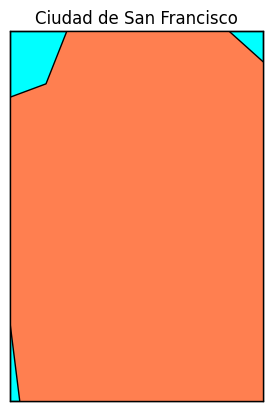

In [ ]:
west, south, east, north = -122.503913,37.681416, -122.394677, 37.807452

# fig = plt.figure(figsize=(18,14))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

plt.title("Ciudad de San Francisco") 
plt.show()

# Degree Centrality

In [ ]:
nx.convert_node_labels_to_integers(G)
degree_centrality = nx.degree_centrality(G) 

In [ ]:
sorted(degree_centrality.items(), key=lambda x:x[1], reverse = True)[:5]

[(207, 0.5968992248062016),
 (3, 0.2622739018087855),
 (117, 0.2054263565891473),
 (145, 0.037467700258397935),
 (187, 0.03488372093023256)]

# Closeness Centrality

In [ ]:
close_centrality = nx.closeness_centrality(G) 

In [ ]:
sorted(close_centrality.items(), key=lambda x:x[1], reverse = True)[:5]

[(207, 0.5280060413147979),
 (186, 0.4200581395348837),
 (1863, 0.41935920752234646),
 (1226, 0.41866259754307344),
 (627, 0.41704613963750176)]

# Betweness Centrality

In [ ]:
bet_centrality = nx.betweenness_centrality(G)
sorted(bet_centrality.items(), key=lambda x:x[1], reverse = True)[:5]

[(207, 0.7828369072994994),
 (3, 0.3193135332059652),
 (117, 0.15603618083460302),
 (145, 0.10089894791382727),
 (422, 0.0891623293921799)]

# Communities using louvain_communities

In [ ]:
from networkx.algorithms.community import louvain_communities

In [ ]:
communities =  louvain_communities(G) 
print(len(communities))

12


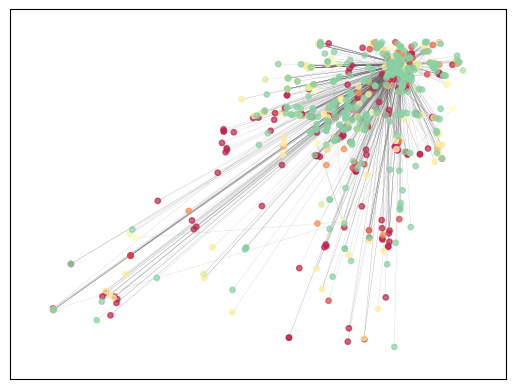

In [ ]:
color_map=[]
colors = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', 
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']
for node in G:
  for community in range(len(communities)):
    if node in communities[community]:
      color_map.append(colors[community])

nx.draw_networkx(G,location,node_color=color_map, alpha=0.7, with_labels=False, edge_color='.4', node_size=15, width=0.1)
plt.show()

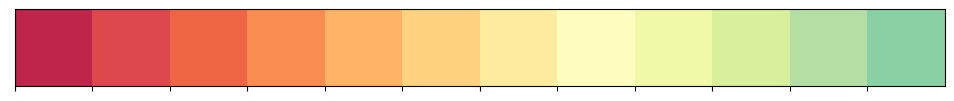

In [ ]:
import seaborn as sns
sns.palplot(colors[:-3])